Здесь представлено только отображение результатов полученных при работе скриптов 
ann_ode.py,
ann_sde.py,
ann_wave.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.abc import x

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42    

In [3]:
f = lambdify(x, (0.072357460529242*sin(1.72753437013566*x) + 1.0*cos(1.72753437013566*x))*exp(-0.125*x))
df = ((0.072357460529242*sin(1.72753437013566*x) + 1.0*cos(1.72753437013566*x))*exp(-0.125*x)).diff(x)
df2 = df.diff(x)
df = lambdify(x, df)
df2 = lambdify(x, df2)
f = np.vectorize(f)
df = np.vectorize(df)
df2 = np.vectorize(df2)

In [9]:
ann_ode_f = np.array([np.array([1.3039971 , 1.16436698, 1.14489571, 1.34328452, 1.30323805,
              1.15555798, 1.15711746, 1.09259649, 1.41406205, 1.2551574 ]),
       np.array([1.00867826, 1.08629978, 1.20604998, 1.1791629 , 1.42938079,
              1.42969586, 0.85715183, 1.22854524, 1.43321924, 1.05439173]),
       np.array([1.39887084, 1.3497188 , 1.16658643, 1.32483665, 1.07193575,
              1.2854013 , 1.30577049, 1.07944753, 1.26385507, 0.89072389]),
       np.array([1.14350501, 1.08652013, 1.21118776, 1.00026155, 1.03344296,
              1.09653998, 1.36986406, 1.14656166, 1.14654728])           ,
       np.array([1.28381928, 1.38898318, 1.23551931, 1.25161819, 1.46805107,
              1.03952361])                                               ,
       np.array([1.56067463, 1.10270315, 1.36413153, 1.4135061 , 1.34403098,
              1.01967028])                                               ,
       np.array([1.5212761 , 1.74890553, 1.19176913, 1.38280547, 1.84693337,
              1.30830463, 1.32810073, 1.64639863])                       ,
       np.array([1.20357141, 2.42340157, 1.98807936, 1.79670436, 2.17753722,
              2.10602554, 2.40781904, 1.38896049])                       ,
       np.array([4.72990658, 5.06666139, 2.17781794, 5.01902574, 5.93275814,
              5.0513911 , 4.63254036, 4.86278798, 5.15405206])           ],
      dtype=object)

In [8]:
ann_ode_f = np.load('C:\\Users\\Mike\\Documents\\Work\\EPDE\\projects\\PDE_DATA\\ANN_data\\ODE_fitness\\ann_ode_data_full.npy', allow_pickle = True)
ann_ode_f.shape

(9,)

In [10]:
import pandas as pd

In [24]:
[arr for arr in ann_ode_f[:3:-1]]

[array([4.72990658, 5.06666139, 2.17781794, 5.01902574, 5.93275814,
        5.0513911 , 4.63254036, 4.86278798, 5.15405206]),
 array([1.20357141, 2.42340157, 1.98807936, 1.79670436, 2.17753722,
        2.10602554, 2.40781904, 1.38896049]),
 array([1.5212761 , 1.74890553, 1.19176913, 1.38280547, 1.84693337,
        1.30830463, 1.32810073, 1.64639863]),
 array([1.56067463, 1.10270315, 1.36413153, 1.4135061 , 1.34403098,
        1.01967028]),
 array([1.28381928, 1.38898318, 1.23551931, 1.25161819, 1.46805107,
        1.03952361])]

In [25]:
[arr for arr in ann_ode_f]

[array([1.3039971 , 1.16436698, 1.14489571, 1.34328452, 1.30323805,
        1.15555798, 1.15711746, 1.09259649, 1.41406205, 1.2551574 ]),
 array([1.00867826, 1.08629978, 1.20604998, 1.1791629 , 1.42938079,
        1.42969586, 0.85715183, 1.22854524, 1.43321924, 1.05439173]),
 array([1.39887084, 1.3497188 , 1.16658643, 1.32483665, 1.07193575,
        1.2854013 , 1.30577049, 1.07944753, 1.26385507, 0.89072389]),
 array([1.14350501, 1.08652013, 1.21118776, 1.00026155, 1.03344296,
        1.09653998, 1.36986406, 1.14656166, 1.14654728]),
 array([1.28381928, 1.38898318, 1.23551931, 1.25161819, 1.46805107,
        1.03952361]),
 array([1.56067463, 1.10270315, 1.36413153, 1.4135061 , 1.34403098,
        1.01967028]),
 array([1.5212761 , 1.74890553, 1.19176913, 1.38280547, 1.84693337,
        1.30830463, 1.32810073, 1.64639863]),
 array([1.20357141, 2.42340157, 1.98807936, 1.79670436, 2.17753722,
        2.10602554, 2.40781904, 1.38896049]),
 array([4.72990658, 5.06666139, 2.17781794, 5.019025

In [26]:
np.hstack([arr for arr in ann_ode_f[:3:-1]]).shape, np.hstack([np.full(shape=ann_ode_f[ann_ode_f.size-1-1*idx].shape[0], fill_value=size) for idx, size in enumerate(epochs)]).shape


((37,), (37,))

In [30]:
epochs = [10000, 20000, 30000, 40000, 50000]
df_clean = pd.DataFrame({'Derivative estim., MSE' : np.hstack([arr for arr in ann_ode_f[:3:-1]]),  #hiss.reshape(-1, order = 'F'), 
                         'Epochs of ANN training' : np.hstack([np.full(shape=ann_ode_f[ann_ode_f.size-1-1*idx].shape[0], fill_value=size) for idx, size in enumerate(epochs)]),
                         'Noise type' : 'clean data'})

import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"

px.defaults.template = "plotly_white"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 600
px.defaults.height = 500

fig = px.box(df_clean, x='Epochs of ANN training', y="Derivative estim., MSE")
fig.update_traces(quartilemethod="linear") # or "inclusive", or "linear" by default
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = epochs,
        ticktext = epochs
    )
)

#fig.update_yaxes(range=[0, 0.006])
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', zeroline = True, zerolinecolor = 'lightgrey', layer = 'below traces')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', zeroline = True, zerolinecolor = 'lightgrey', layer = 'below traces')
fig.update_layout(
    font_family="Helvetica",
    font_color="black",
    font_size=18,
    title_font_family="Helvetica",
    title_font_color="black",
    title_font_size=18,
    legend_title_font_family='Helvetica',
    legend_title_font_color="black",
    legend_title_font_size=18
)
fig.write_image('ANN_fit.png', scale=3)
fig.show()

([<matplotlib.axis.XTick at 0x18ed53149a0>,
 [Text(0, 0, ''),
  Text(1, 0, '10000'),
  Text(2, 0, '20000'),
  Text(3, 0, '30000'),
  Text(4, 0, '40000'),
  Text(5, 0, '50000')])

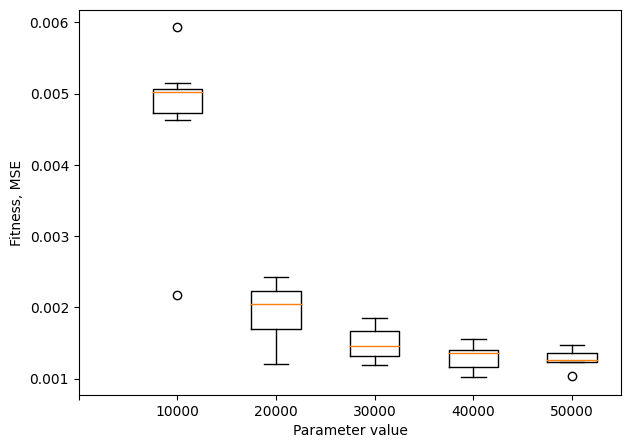

In [5]:
plt.figure(figsize=(7, 5), dpi=100)
plt.boxplot(ann_ode_f[:3:-1]/1000)
plt.ylabel("Fitness, MSE")
plt.xlabel('Parameter value')
plt.xticks(np.arange(6), ['',10000,20000,30000,40000,50000])

In [10]:
ode_diff = np.load('E:\pde_mine/ode_diff.npy', allow_pickle=True)
ode_diff

array([[[[-0.08873402, -0.09726087, -0.11471352, ...,  0.51207954,
           0.51288003,  0.51324105],
         [-0.00950934, -0.02527389, -0.05676429, ...,  0.55581939,
           0.55850947,  0.55979449],
         [ 0.02873644,  0.00563892, -0.03900795, ...,  0.50872529,
           0.50938326,  0.50966311],
         ...,
         [-0.18275563, -0.19098476, -0.20750256, ..., -0.29311344,
          -0.2925016 , -0.29220834],
         [-0.21931629, -0.22835523, -0.24650456, ..., -0.42797402,
          -0.42782217, -0.42769417],
         [-0.18865059, -0.19627236, -0.21168858, ..., -0.19078827,
          -0.18990402, -0.18946934]],

        [[-0.08873402, -0.09726087, -0.11471352, ...,  0.51207954,
           0.51288003,  0.51324105],
         [-0.00950934, -0.02527389, -0.05676429, ...,  0.55581939,
           0.55850947,  0.55979449],
         [ 0.02873644,  0.00563892, -0.03900795, ...,  0.50872529,
           0.50938326,  0.50966311],
         ...,
         [-0.18275563, -0.19098476

In [34]:
ode_diff[0][2][9]-ode_diff[0][0][10]

array([ 6.62676720e-02,  5.22894748e-02,  2.66880840e-02,  6.11229986e-03,
       -8.98236781e-03, -1.85929388e-02, -2.31094211e-02, -2.33297348e-02,
       -2.03524977e-02, -1.54876709e-02, -1.00273788e-02, -4.82612848e-03,
       -5.89489937e-04,  2.24485993e-03,  3.70967388e-03,  3.87933850e-03,
        3.00702453e-03,  1.42312050e-03, -6.28232956e-04, -2.81053782e-03,
       -4.93335724e-03, -6.89530373e-03, -8.57150555e-03, -9.84579325e-03,
       -1.07181072e-02, -1.12152696e-02, -1.13105774e-02, -1.10723972e-02,
       -1.05573535e-02, -9.77426767e-03, -8.78286362e-03, -7.69025087e-03,
       -6.54995441e-03, -5.38289547e-03, -4.23663855e-03, -3.19159031e-03,
       -2.31629610e-03, -1.62261724e-03, -1.10459328e-03, -8.06808472e-04,
       -7.29441643e-04, -8.66413116e-04, -1.24740601e-03, -1.80721283e-03,
       -2.50685215e-03, -3.33750248e-03, -4.28128242e-03, -5.29360771e-03,
       -6.32071495e-03, -7.28237629e-03, -8.17859173e-03, -8.99136066e-03,
       -9.67311859e-03, -

In [13]:
df_ = df2(np.linspace(0,1,1000))
df_

array([-3.00000000e+00, -2.99924483e+00, -2.99848084e+00, -2.99770803e+00,
       -2.99692640e+00, -2.99613596e+00, -2.99533671e+00, -2.99452866e+00,
       -2.99371181e+00, -2.99288617e+00, -2.99205174e+00, -2.99120852e+00,
       -2.99035653e+00, -2.98949576e+00, -2.98862622e+00, -2.98774791e+00,
       -2.98686085e+00, -2.98596503e+00, -2.98506045e+00, -2.98414714e+00,
       -2.98322508e+00, -2.98229429e+00, -2.98135476e+00, -2.98040651e+00,
       -2.97944954e+00, -2.97848385e+00, -2.97750946e+00, -2.97652635e+00,
       -2.97553455e+00, -2.97453405e+00, -2.97352486e+00, -2.97250699e+00,
       -2.97148044e+00, -2.97044521e+00, -2.96940131e+00, -2.96834875e+00,
       -2.96728754e+00, -2.96621766e+00, -2.96513915e+00, -2.96405198e+00,
       -2.96295619e+00, -2.96185176e+00, -2.96073870e+00, -2.95961703e+00,
       -2.95848674e+00, -2.95734784e+00, -2.95620033e+00, -2.95504423e+00,
       -2.95387954e+00, -2.95270626e+00, -2.95152439e+00, -2.95033396e+00,
       -2.94913495e+00, -

In [12]:
err_1 = []
for j in range(1,10):
    err_st = []
    for i in ode_diff[0][1][10*(j-1):j*10]:
        err_st.append(np.linalg.norm(i-df_))
    err_1.append(err_st)

In [16]:
err_1

[[43.841565803329395,
  43.80402768268639,
  43.78866368335771,
  43.82926193985319,
  43.831618172132146,
  43.79328286065135,
  43.862553032554054,
  43.84892432325555,
  43.841894982985245,
  43.850415646437895],
 [43.8285891964973,
  43.86332239288134,
  43.82244531512704,
  43.796360609178905,
  43.80298639727383,
  43.8875928624738,
  43.76481534044449,
  43.8701748559441,
  43.85456421849422,
  43.81190344668398],
 [43.82089786643748,
  43.763898766310504,
  43.829667177352974,
  43.83155145884193,
  43.85683284515661,
  43.828370394949836,
  43.8722452071165,
  43.851931343672106,
  43.812774657271554,
  43.83372437374012],
 [43.87806641031926,
  43.81793953611285,
  43.87516426227221,
  43.878238965066075,
  43.778270537573384,
  43.782661159454435,
  43.798968961141696,
  43.828698287307446,
  43.8443418205603,
  43.8674122761022],
 [43.82746026971711,
  43.836302898882835,
  43.83777094864623,
  43.865808709222755,
  43.77975257967693,
  43.81674264027193,
  43.8065694246202

In [14]:
err_2 = []
for j in range(1,10):
    err_st = []
    for i in ode_diff[1][1][10*(j-1):j*10]:
        err_st.append(np.linalg.norm(i-df_))
    err_2.append(err_st)

In [26]:
for i in range(len(err_2)):
    err_2[i] = np.array(err_2[i])


(array([0.041 , 0.0415, 0.042 , 0.0425, 0.043 , 0.0435, 0.044 , 0.0445]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

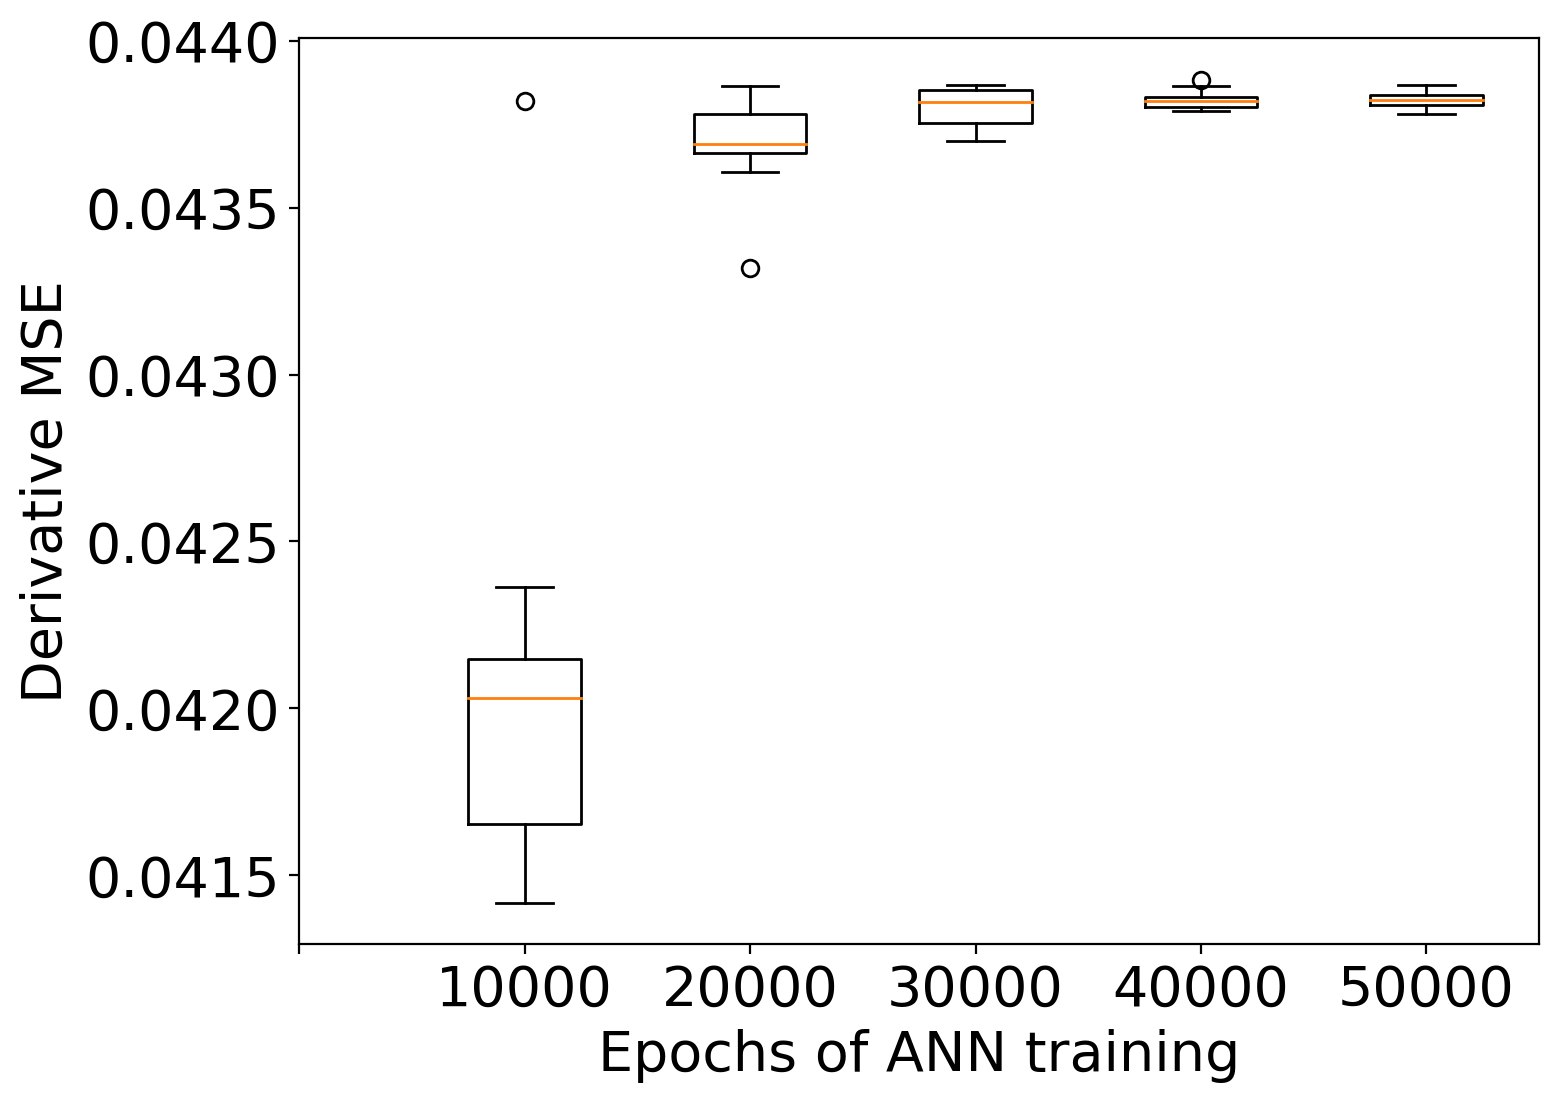

In [70]:
plt.figure(figsize=(8, 6), dpi=200)
plt.boxplot((np.array(err_1)/1000)[:3:-1].T)
plt.ylabel("Derivative MSE", fontsize = 20)
plt.xlabel('Epochs of ANN training', fontsize = 20)
plt.xticks(np.arange(6), ['',10000,20000,30000,40000,50000], fontsize = 20)
plt.yticks(fontsize = 20)

In [22]:
np.arange(1.3e4,1e5,1e4)

array([13000., 23000., 33000., 43000., 53000., 63000., 73000., 83000.,
       93000.])

(array([0.071 , 0.0711, 0.0712, 0.0713, 0.0714, 0.0715, 0.0716]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

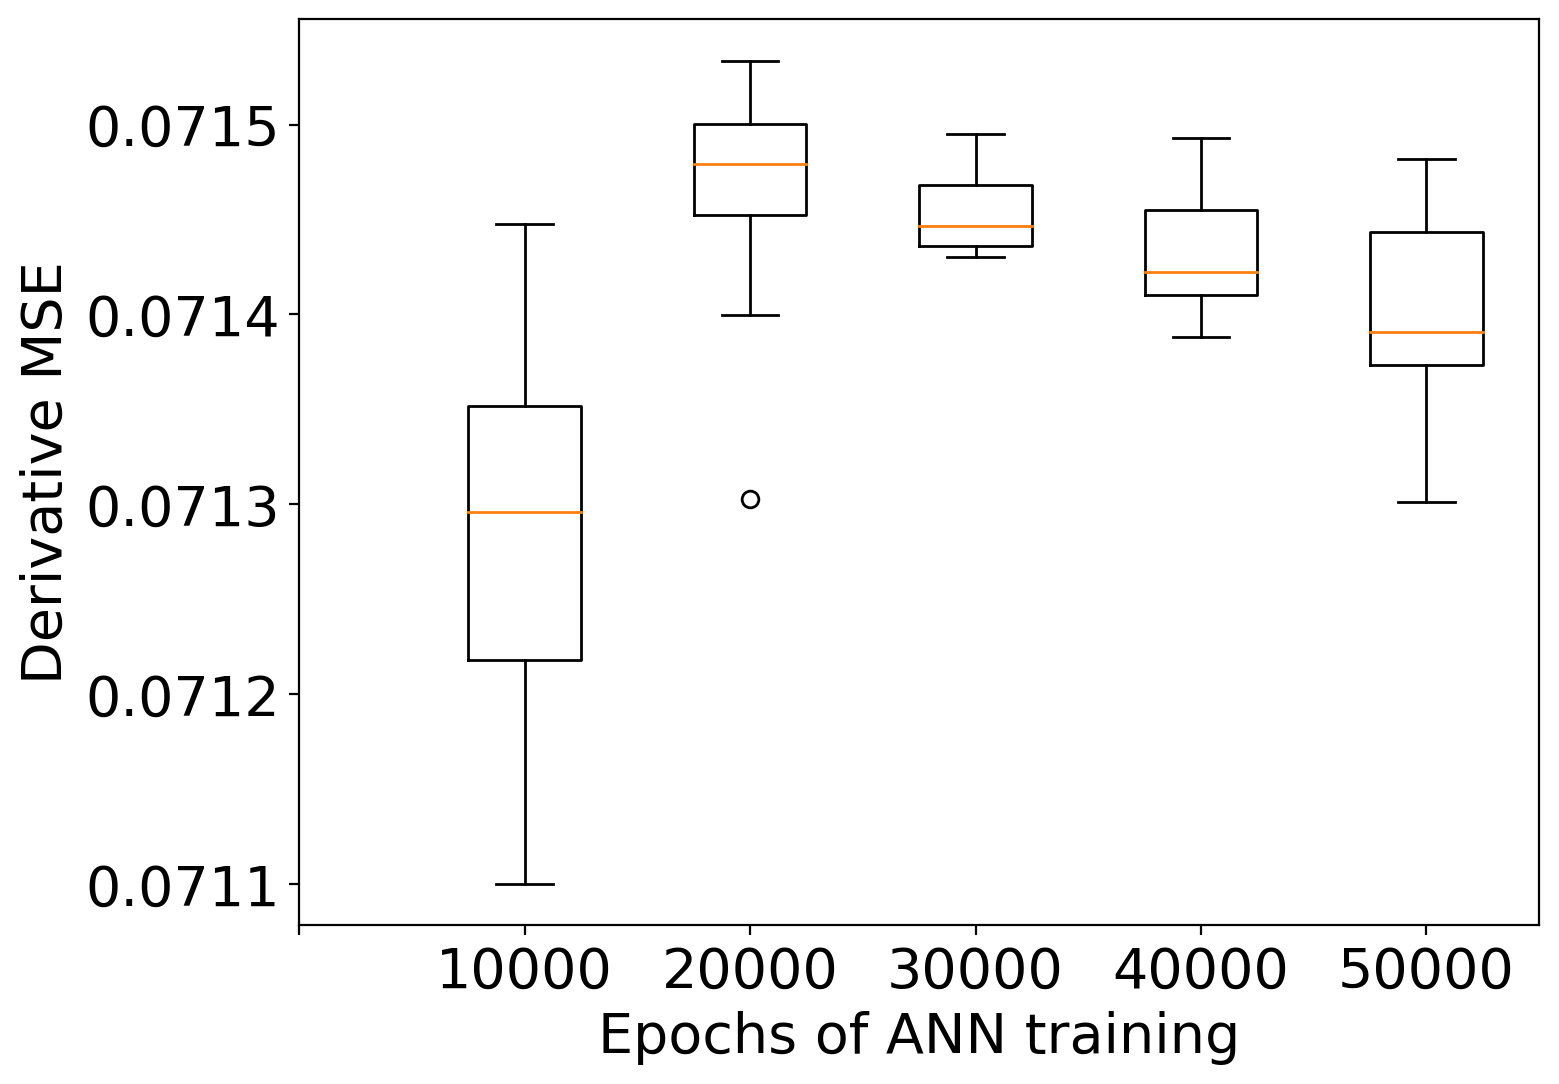

In [69]:
plt.figure(figsize=(8, 6), dpi=200)
plt.boxplot((np.array(err_2)/1000)[:3:-1].T)
plt.ylabel("Derivative MSE", fontsize = 20)
plt.xlabel('Epochs of ANN training', fontsize = 20)
plt.xticks(np.arange(6), ['',10000,20000,30000,40000,50000], fontsize = 20)
plt.yticks(fontsize = 20)

In [29]:
system_data = np.load('ann_sde_data.npy', allow_pickle=True)
# system_data

Text(0.5, 0, 'Номер запуска')

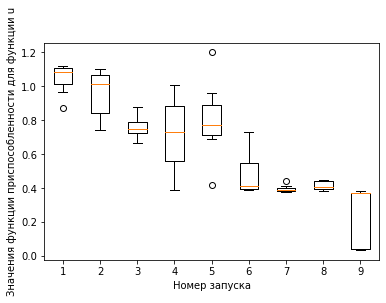

In [30]:
# plt.boxplot(system_data[::3])
plt.boxplot(system_data.T[::2])
plt.ylabel("Значения функции приспособленности для функции u")
plt.xlabel('Номер запуска')

Text(0.5, 0, 'Номер запуска')

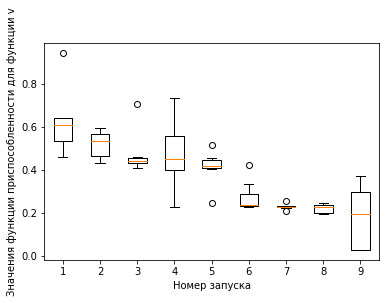

In [31]:
plt.boxplot(system_data.T[1::2])
plt.ylabel("Значения функции приспособленности для функции v")
plt.xlabel('Номер запуска')


In [34]:
system_diff = np.load('system_diff.npy', allow_pickle=True)
system_diff

array([[[-8.76976848e-01, -8.33163559e-01, -7.41595030e-01, ...,
          1.51783228e-02,  1.51604414e-02,  1.51526928e-02],
        [-8.77534747e-01, -8.32732618e-01, -7.41593242e-01, ...,
          1.19358301e-03,  1.18613243e-03,  1.17838383e-03],
        [-9.50669050e-01, -8.74356031e-01, -7.44421482e-01, ...,
          1.64270401e-03,  1.63346529e-03,  1.63137913e-03],
        ...,
        [-9.43326354e-01, -8.82662535e-01, -7.72117376e-01, ...,
          3.49879265e-03,  3.49372625e-03,  3.49044800e-03],
        [-8.45035911e-01, -8.12517405e-01, -7.42754042e-01, ...,
          4.34458256e-03,  4.34368849e-03,  4.34279442e-03],
        [-8.17379355e-01, -8.00096989e-01, -7.50950575e-01, ...,
          3.47793102e-03,  3.47763300e-03,  3.47673893e-03]],

       [[-4.13399935e-02, -8.82619619e-02, -1.71146989e-01, ...,
         -4.48152423e-04, -4.46587801e-04, -4.43160534e-04],
        [-4.01973724e-02, -8.35600495e-02, -1.62507594e-01, ...,
         -2.56597996e-04, -2.55629420e

In [36]:
err_u = []
err_v = []
du = np.load('du.npy')
dv = np.load('dv.npy')
for i in range(9):
    err_u.append(np.linalg.norm(system_diff[0][i]-du))
    err_v.append(np.linalg.norm(system_diff[1][i]-dv))

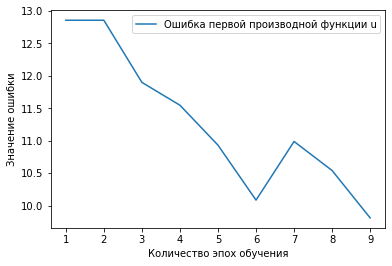

In [39]:
plt.plot(np.arange(1,10), err_u[::-1], label = 'Ошибка первой производной функции u')
plt.ylabel('Значение ошибки')
plt.xlabel('Количество эпох обучения')
plt.legend()

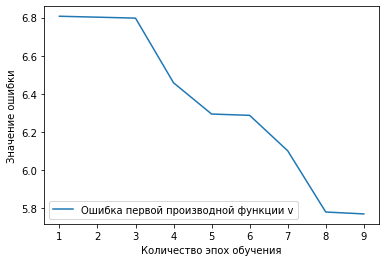

In [40]:
plt.plot(np.arange(1,10), err_v[::-1], label = 'Ошибка первой производной функции v')
plt.ylabel('Значение ошибки')
plt.xlabel('Количество эпох обучения')
plt.legend()

In [30]:
wave_data = np.load('E:\pde_mine/ann_wave_data.npy', allow_pickle=True)
wave_data

array([array([  3.90531463,  91.30896837,   4.89996733,  24.03187377,
                4.90252757, 532.36057133,   4.89293923,   4.90836798,
                4.01510858])                                         ,
       array([4.90116735, 5.06927322, 4.90149163, 4.91065136, 4.89769541,
              4.91523687, 4.18497545, 4.88865981, 4.21123741, 4.91040573]),
       array([ 4.89019663, 73.65104672,  4.23669424,  4.90226179, 73.58520239,
              12.91406869, 24.08246562,  4.92169651,  3.82551384])            ,
       array([  4.92092728,   4.76027797,   4.9086751 ,  24.56488312,
                9.37359874, 318.64573956,  73.63158299,   4.88725623,
                4.92393497])                                         ,
       array([10.36053326,  8.94424949, 12.75322998,  5.23260989,  4.90523743,
              12.90222801,  4.90014089,  7.17371395])                         ,
       array([ 11.78886034,   7.08097829, 318.08982978,   4.88827579,
              322.35384838,   4.89851419

(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

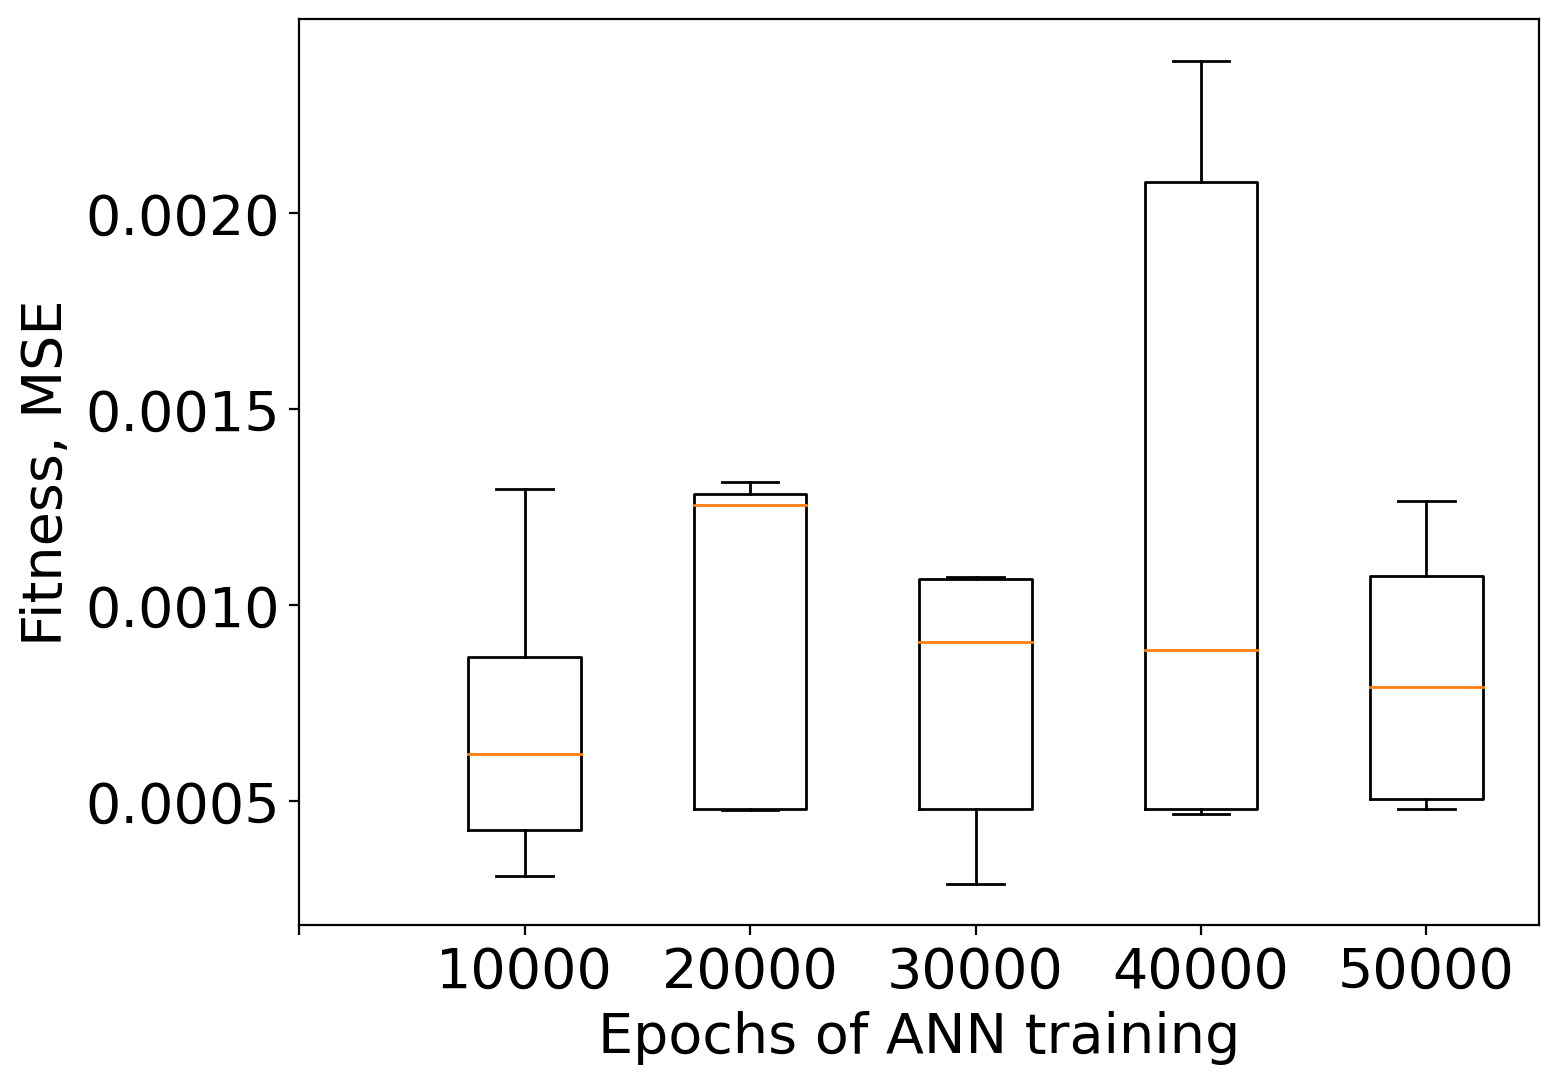

In [68]:
plt.figure(figsize=(8, 6), dpi=200)
plt.boxplot(wave_data[:3:-1]/10201, showfliers=False)
plt.ylabel("Fitness, MSE", fontsize = 20)
plt.xlabel('Epochs of ANN training', fontsize = 20)
plt.xticks(np.arange(6), ['',10000,20000,30000,40000,50000], fontsize = 20)
plt.yticks(fontsize = 20)

In [33]:
wave_diff = np.load('E:\pde_mine/wave_diff_new.npy', allow_pickle=True)
wave_diff

array([[[[ 1.89009011e+00,  1.86724293e+00,  1.86886489e+00, ...,
           1.71404343e+01,  1.70764027e+01,  1.70114231e+01],
         [ 2.40067816e+00,  2.39225078e+00,  2.40760255e+00, ...,
           1.76308975e+01,  1.75663948e+01,  1.75005131e+01],
         [ 3.61734295e+00,  3.63849783e+00,  3.67831922e+00, ...,
           1.85450401e+01,  1.84821739e+01,  1.84171047e+01],
         ...,
         [-4.93733644e+00, -4.91988564e+00, -4.91085529e+00, ...,
          -1.76403694e+01, -1.74993286e+01, -1.73551426e+01],
         [-4.04487944e+00, -4.06300879e+00, -4.09277439e+00, ...,
          -1.63835754e+01, -1.62458572e+01, -1.61070862e+01],
         [-3.66473722e+00, -3.70464563e+00, -3.75747681e+00, ...,
          -1.57347336e+01, -1.56018114e+01, -1.54687767e+01]],

        [[ 1.55353701e+00,  1.61839759e+00,  1.70314991e+00, ...,
           1.70186443e+01,  1.69408798e+01,  1.68616276e+01],
         [ 2.14328766e+00,  2.21153378e+00,  2.29634023e+00, ...,
           1.75242119e

In [15]:
wave_diff[0].shape

(90, 101, 101)

In [10]:
wave_diff[0][10*(j-1):j*10].shape

(10, 101, 101)

In [35]:
dx = np.load('E:\pde_mine/d_dxwaxe.npy')
dt = np.load('E:\pde_mine/d_dtwave.npy') 
d2x = np.load('E:\pde_mine/d2_dx2wave.npy')
d2t = np.load('E:\pde_mine/d2_dt2wave.npy')
# err_1x = []
# err_1t = []
# err_2x = []
# err_2t = []
# for i in range(9):
#     err1x = np.linalg.norm((wave_diff[0][i] - dx).flatten())
#     err2x = np.linalg.norm((wave_diff[2][i] - d2x).flatten())
#     err1t = np.linalg.norm((wave_diff[1][i] - dt).flatten())
#     err2t = np.linalg.norm((wave_diff[3][i] - d2t).flatten())
#     err_1t.append(err1t)
#     err_1x.append(err1x)
#     err_2t.append(err2t)
#     err_2x.append(err2x)
# err_1t
err_1x = []
for j in range(1,10):
    err_st = []
    for i in wave_diff[0][10*(j-1):j*10]:
        err_st.append(np.linalg.norm((i-dx).flatten()))
    err_1x.append(err_st)
    
err_2x = []
for j in range(1,10):
    err_st = []
    for i in wave_diff[2][10*(j-1):j*10]:
        err_st.append(np.linalg.norm((i-d2x).flatten()))
    err_2x.append(err_st)
    
err_1t = []
for j in range(1,10):
    err_st = []
    for i in wave_diff[1][10*(j-1):j*10]:
        err_st.append(np.linalg.norm((i-dt).flatten()))
    err_1t.append(err_st)
    
err_2t = []
for j in range(1,10):
    err_st = []
    for i in wave_diff[3][10*(j-1):j*10]:
        err_st.append(np.linalg.norm((i-d2t).flatten()))
    err_2t.append(err_st)    

(array([0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

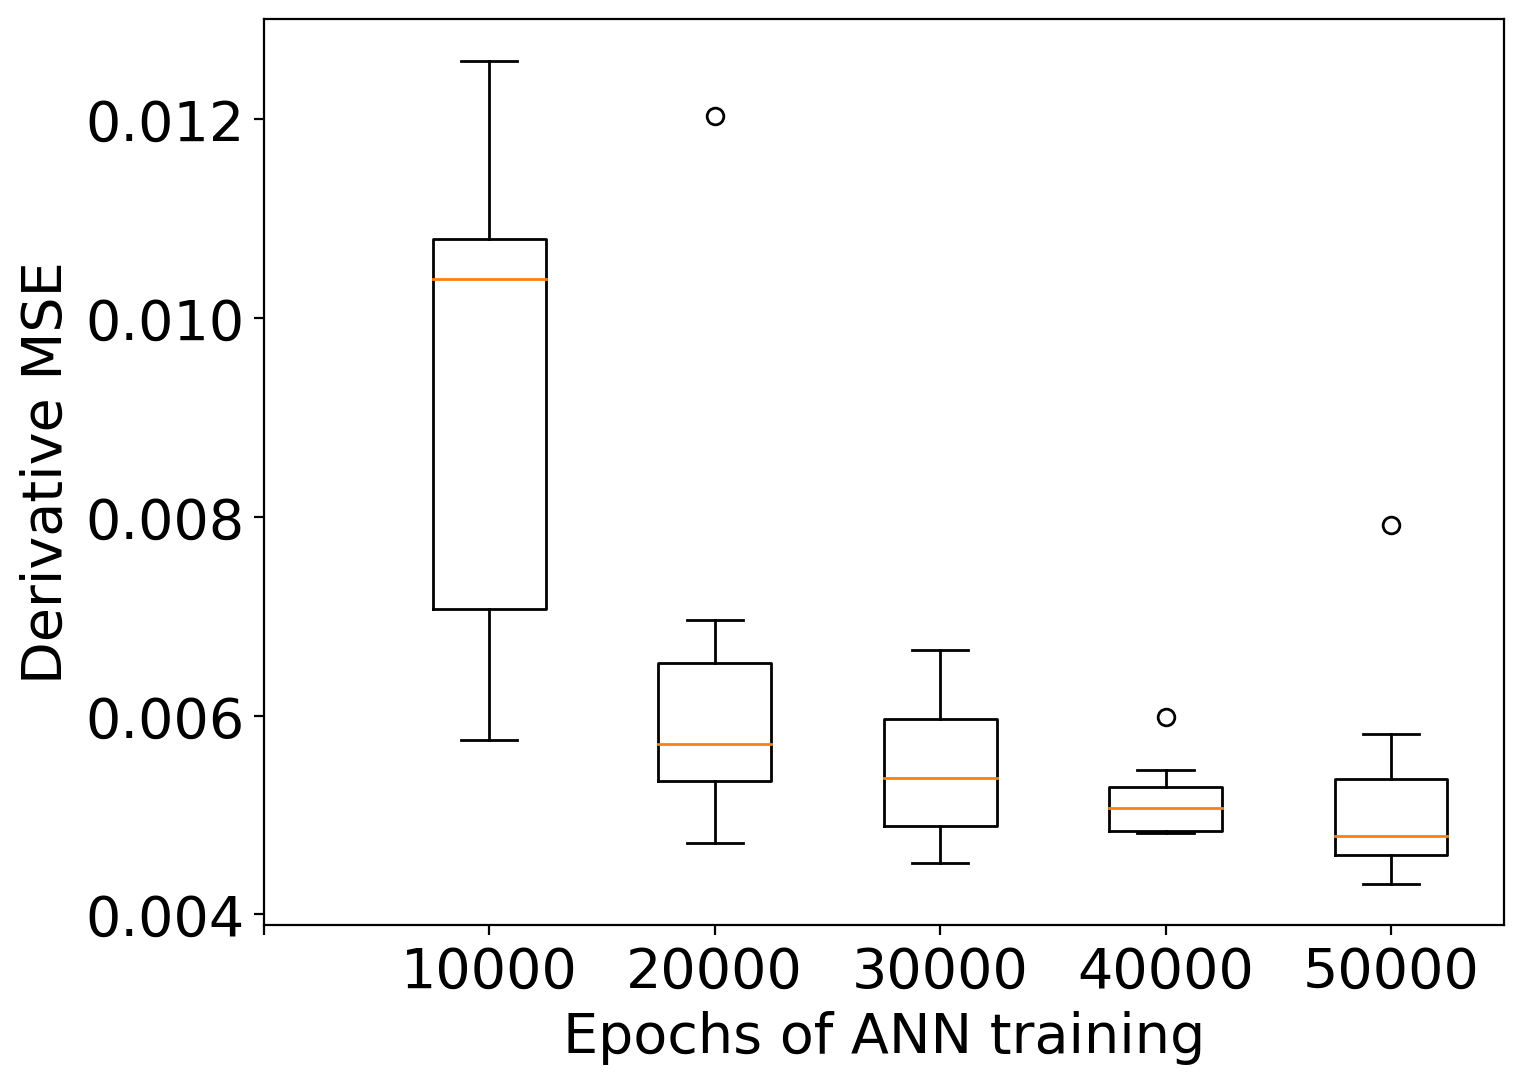

In [67]:
plt.figure(figsize=(8, 6), dpi=200)
plt.boxplot(np.array(err_2t[:3:-1]).T/10201)
plt.ylabel("Derivative MSE", fontsize = 20)
plt.xlabel('Epochs of ANN training', fontsize = 20)
plt.xticks(np.arange(6), ['',10000,20000,30000,40000,50000], fontsize = 20)
plt.yticks(fontsize = 20)

(array([0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

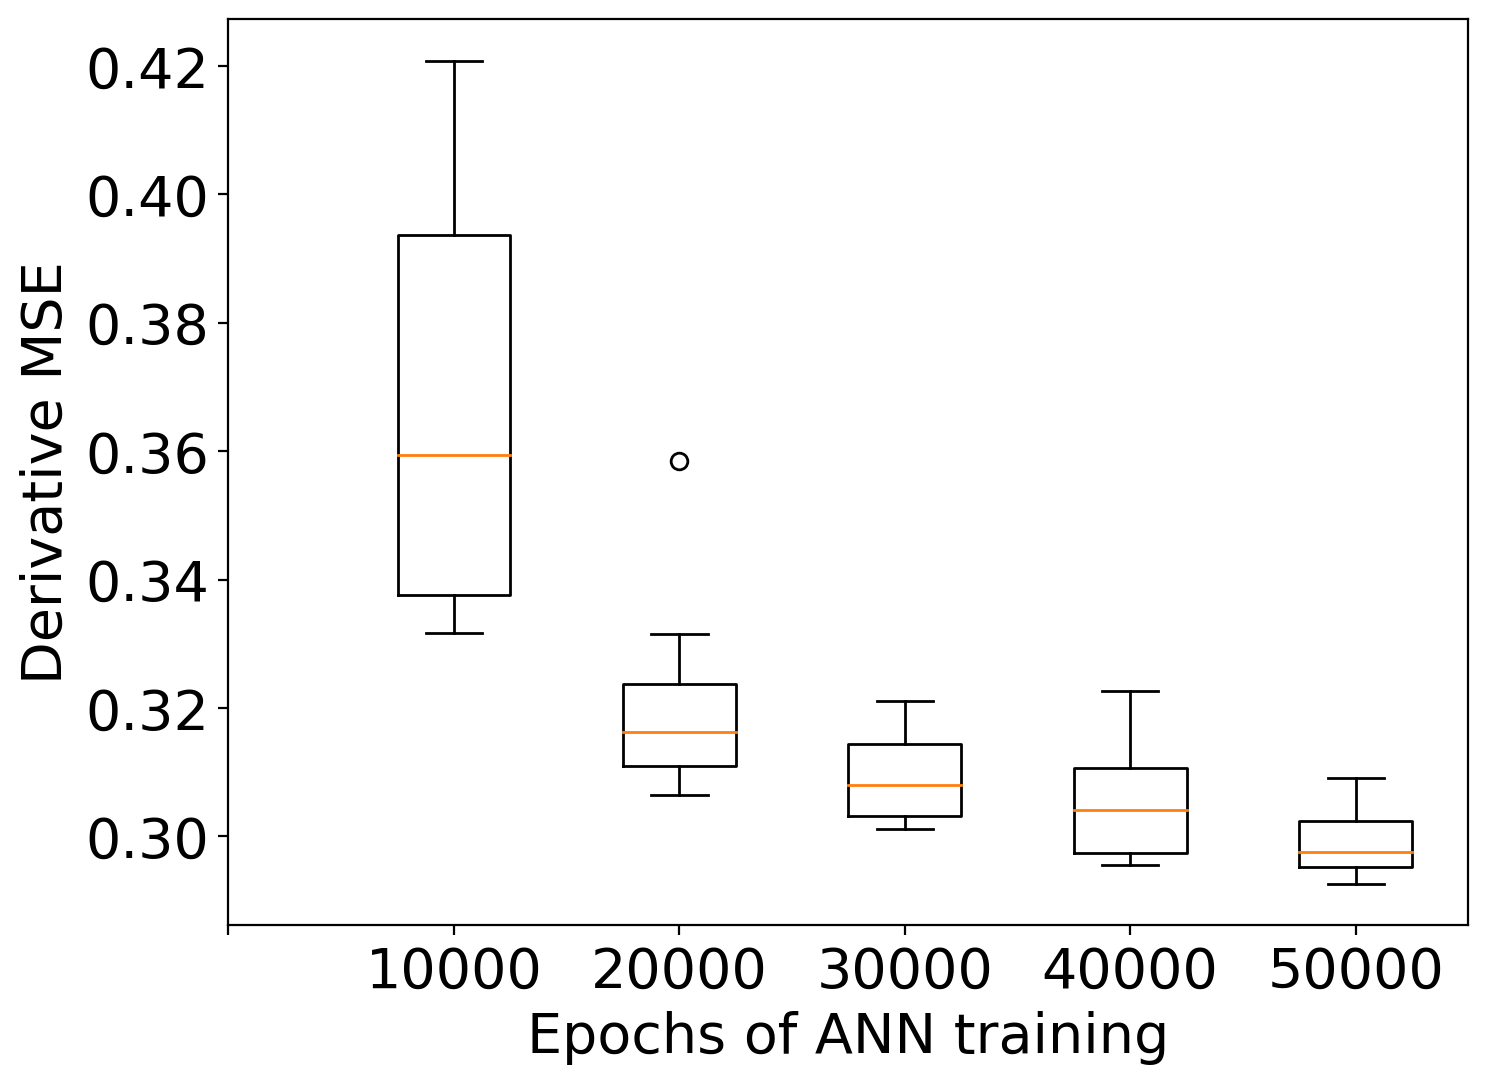

In [66]:
plt.figure(figsize=(8, 6), dpi=200)
plt.boxplot(np.array(err_2x[:3:-1]).T/10201)
plt.ylabel("Derivative MSE", fontsize = 20)
plt.xlabel('Epochs of ANN training', fontsize = 20)
plt.xticks(np.arange(6), ['',10000,20000,30000,40000,50000], fontsize = 20)
plt.yticks(fontsize = 20)

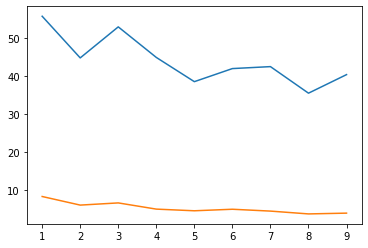

In [94]:
plt.plot(np.arange(1,10), err_1x[::-1])
plt.plot(np.arange(1,10), err_1t[::-1])

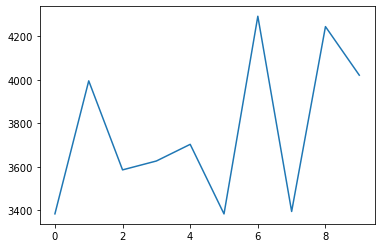

In [50]:
plt.plot(np.arange(0,10), err_2x[::-1][0])

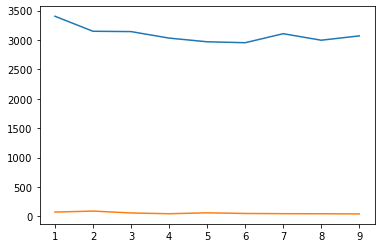

In [93]:
plt.plot(np.arange(1,10), err_2t[::-1])

(array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

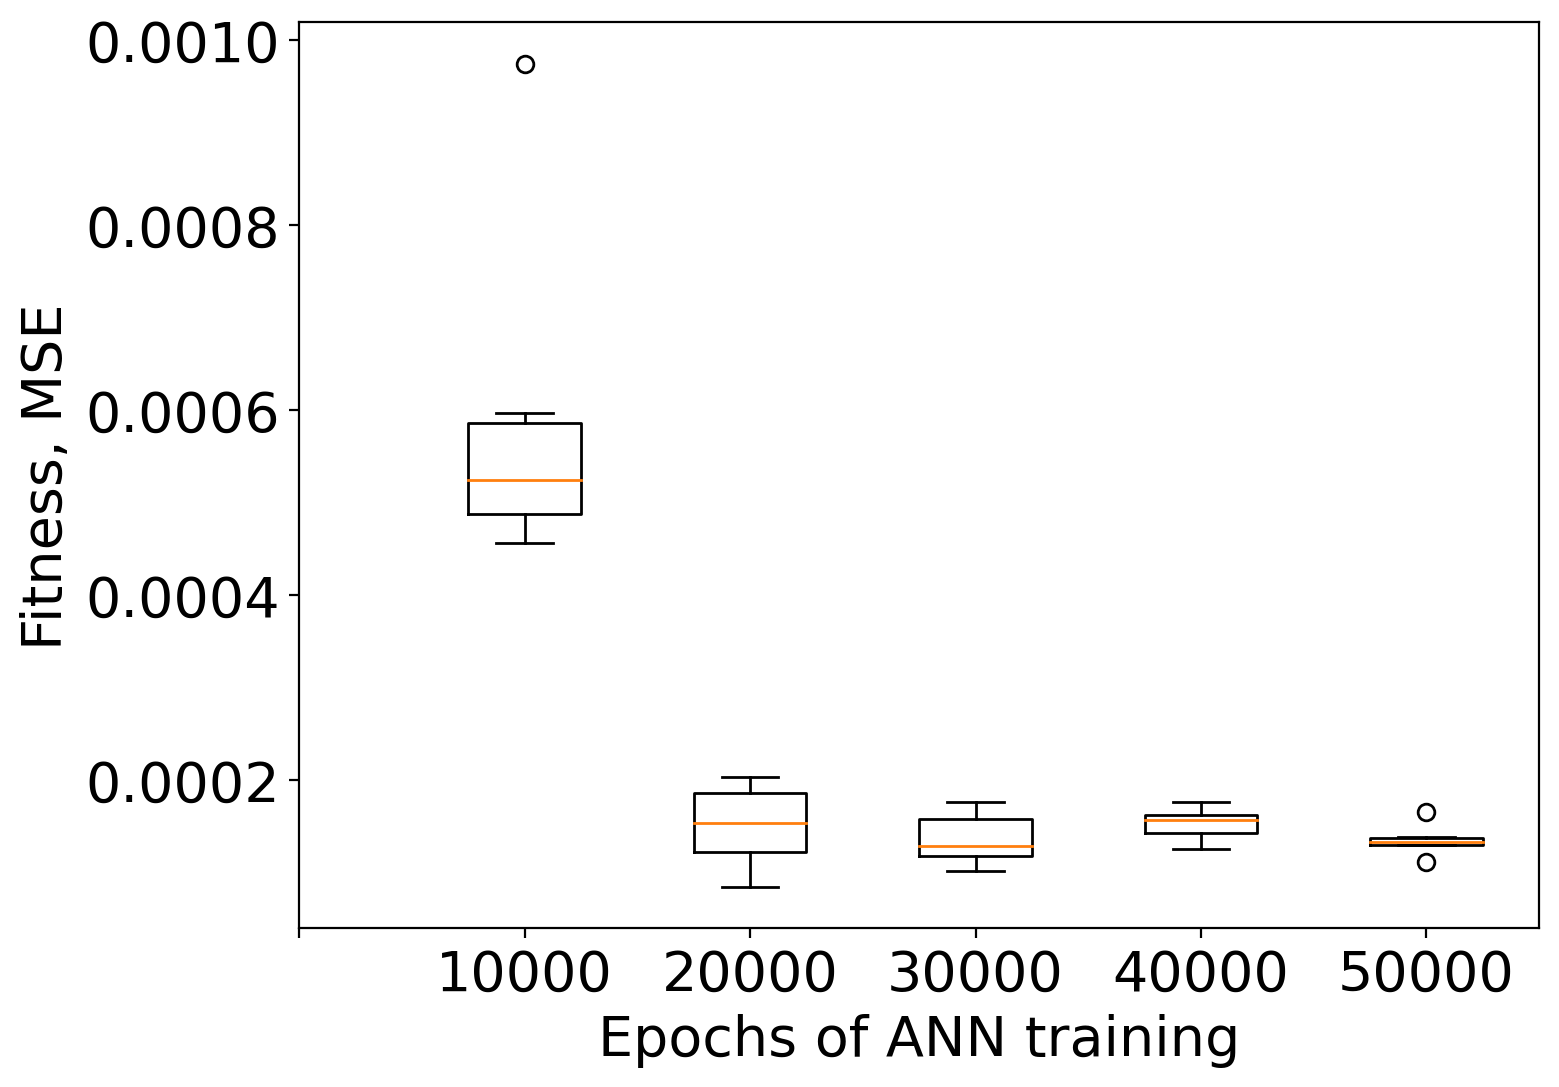

In [63]:
h = np.load('E:\pde_mine/noise_ann_ode_data_pr.npy', allow_pickle=True)/10201
plt.figure(figsize=(8, 6), dpi=200)
plt.boxplot(h.T)
plt.ylabel("Fitness, MSE", fontsize = 20)
plt.xlabel('Epochs of ANN training', fontsize = 20)
plt.xticks(np.arange(6), ['',10000,20000,30000,40000,50000], fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

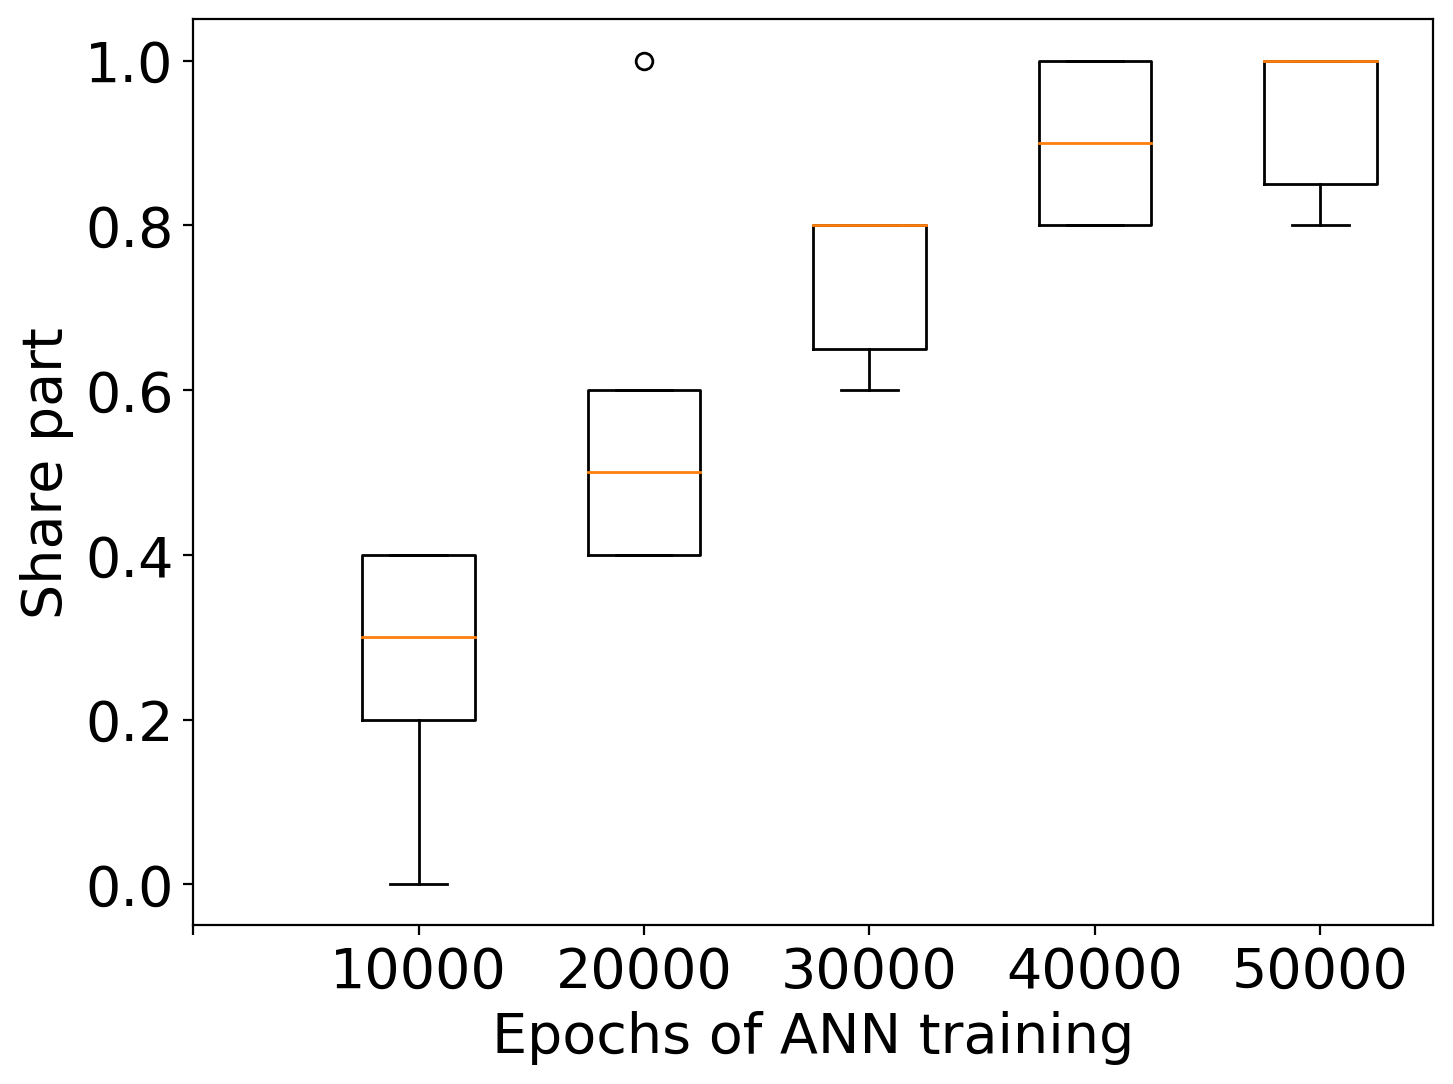

In [61]:
ch = np.load('E:\pde_mine/noise_ann_ode_data_par_pr.npy', allow_pickle=True).T
plt.figure(figsize=(8, 6), dpi=200)
plt.boxplot(ch)
plt.ylabel("Share part", fontsize = 20)
plt.xlabel('Epochs of ANN training', fontsize = 20)
plt.xticks(np.arange(6), ['',10000,20000,30000,40000,50000], fontsize = 20)
plt.yticks(fontsize = 20)